# Projet - 3M236

In [1]:
import numpy as np
import approx_EDO as EDO
import matplotlib.pyplot as plt
import math
%matplotlib  inline

## 1 -  Pendule simple

L'equation de le pendule simple est:

$$(E) \equiv \left\{
        \begin{array}{l}
           m\theta '' (t) + m\frac{g}{l} sin( \theta(t)) = Bcos(\Omega t) \\
           \theta (0)= \theta_0 \\
           \theta '(0) = r_0
        \end{array}
   \right.$$
  
Si bien, c'est vrai que on approche generalement a la formule linéaire

$$(EL) \equiv \left\{
        \begin{array}{l}
           m\theta '' (t) + m\frac{g}{l} \theta(t) = Bcos(\Omega t) \\
           \theta (0)= \theta_0 \\
           \theta '(0) = r_0
        \end{array}
   \right.$$
   
Ses deux equations doivent être valables pout $t \in [0,T]$ où $m$ est la masse du pendule $g$ la constante de la gravité sur la terre, $l$ la longueur du fil du pendule, et $B$ et $\Omega$ deux constantes positifs non nules.

### Linearité des solutions

La deuxieme equation est lineaire parce que on peut voir que son equation homogene associe est lineaire. Ce qui n'est pas le cas de la premiere equation.

On aurait que le fonction $g : t,(u,v) \mapsto (f(t,(u,v),h(t,(u,v))$ avec $f$  et $h$ differents pour chaque equation:

Pour $(E)$ on a :

$$
\begin{array}{l}
    f(t,u,v) = v \\
    h(t,u,v) = \frac{B}{m}cos(\Omega t) - \frac{g}{l} sin(u)
\end{array}
$$

Pour $(EL)$ on a :

$$
\begin{array}{l}
    f(t,u,v) = v \\
    h(t,u,v) = \frac{B}{m}cos(\Omega t) - \frac{g}{l} u
\end{array}
$$

In [2]:
def define_g_NL(B,m,l,omega): #Fonction pour definir f et h dependant des attributs
    return lambda x,t : np.array([x[1], B*math.cos(omega*t)/m - 9.81*math.sin(x[0])/l])

In [3]:
def define_g_L(B,m,l,omega):
    return lambda x,t : np.array([x[1], B*math.cos(omega*t)/m - 9.81*x[0]/l])

### Commencer les preuves

Pour ces preuves on va utiliser $l = 1, m = 1, B=0$. La donnée initialle est, cette fois $(\theta_0 , r_0) = (\frac{\pi}{6}, 0)$

On va approximmer numeriquemente les solutions avec la méthode d'Euler symplectique.

In [4]:
g_L = define_g_L(0,1,1,1)
g_NL = define_g_NL(0,1,1,1)

T = 10
dt = 10.0/10000
x0 = [math.pi/6,0]

tL, xL = EDO.EulerSymplectique(0,x0,T,dt,g_L)

tNL, xNL = EDO.EulerSymplectique(0,x0,T,dt,g_NL)

On va voir les differences entre les deux differents equations en representant la position apres le temp du pendule simple et les deux portraits de phase.

In [5]:
def plot_pos_et_port(solutions):
    c_map = EDO.get_cmap(len(solutions))
    pos = 0
    for sol in solutions:
        t_ = sol[0]
        u_ = [x[0] for x in sol[1]]
        v_ = [x[1] for x in sol[1]]
        plt.subplot(121)
        plt.plot(t_,u_,color=c_map(pos))
        plt.subplot(122)
        plt.plot(u_,v_,color=c_map(pos))
        pos += 1
    plt.subplot(121)
    plt.legend (['L','NL'])
    plt.subplot(122)
    plt.legend (['L','NL'])

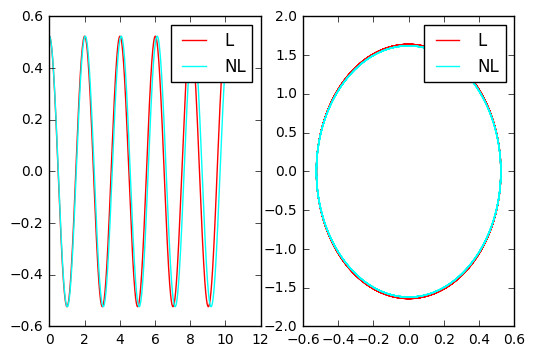

In [6]:
solutions = [[tL,xL],[tNL,xNL]]

plot_pos_et_port(solutions)

Maintenant si on prend **autre** $(\theta_0 , r_0) = (\frac{\pi}{2}, 0)$

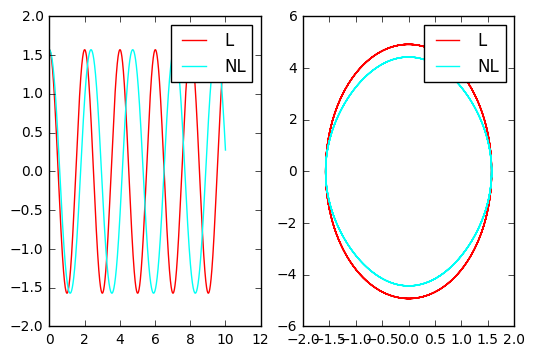

In [7]:
x0 = [math.pi/2,0]

tL, xL = EDO.EulerSymplectique(0,x0,T,dt,g_L)
tNL, xNL = EDO.EulerSymplectique(0,x0,T,dt,g_NL)

solutions = [[tL,xL],[tNL,xNL]]

plot_pos_et_port(solutions)

Donc c'est claire que quand on prend des données initialles petites l'approximation lineaire est bonne mais avec points plus externes l'approximation est faible.

### Cas lineaire

Dans le cadre de ce cas concret on peut exprimer la solution de façon plus concrete. Si $B=0$ on a que la solution exacte est:

In [8]:
def solExactePourEH(x0, landa, mu):
    A = x0[0]
    B = ((x0[1]-x0[0]*landa)/mu)
    u = lambda t : A*math.exp(landa*t)*math.cos(mu*t) + B*math.exp(landa*t)*math.sin(mu*t)
    v = lambda t : landa*A*math.exp(landa*t)*math.cos(mu*t) - mu*A*math.exp(landa*t)*math.sin(mu*t) + landa*B*math.exp(landa*t)*math.sin(mu*t) + mu*B*math.exp(landa*t)*math.cos(mu*t)
    return u, v

Ça fait que soit facile trouver l'ordre du schema d'Euler de façon numérique, pour ça on va trouver le max pour different $N$. Ou $N$ est le nombre de partitions.

In [9]:
pos, vit = solExactePourEH(x0,0,math.sqrt(9.81))

In [10]:
T = 1
Ndis=10
N=np.logspace(1,5,Ndis)
err_es=[]
h=[]
for n in N:
    dt = T/(n+1)
    t_, yes_ = EDO.EulerSymplectique(0,x0,T,dt,g_L)
    ye_ = [[pos(t),vit(t)] for t in t_]
    err_es.append(EDO.errormax(ye_,yes_))
    h.append(dt)
h2 = [dt**2 for dt in h]

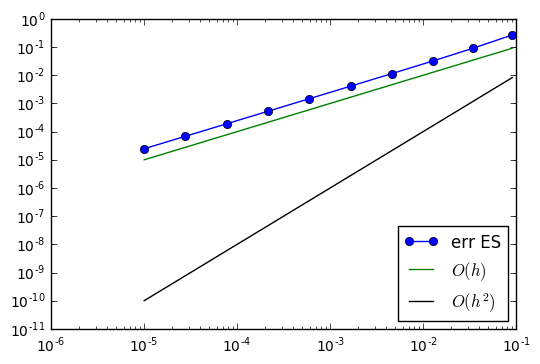

In [11]:
plt.yscale('log')
plt.xscale('log')
plt.plot(h,err_es,'-o',h,h,h,h2,'-k',)
plt.legend(['err ES','$O(h)$','$O(h^2)$'],loc=4)

Donc on a que le methode d'Euler Symplectique est d'ordre 1

### Forme speciale pour notre equation

On cherche une solution de la forme $\theta (x) = Acos(\omega t)$ avec $A$ en fonction de $g, l, m, \Omega, B$ 

Si on travaille un peu avec les equations on a que elle va etre solution pour ces deux conditions ci desous:

$$ A = \frac{g}{l \omega^2} - \frac{B}{m \omega^2} \quad \Omega = \omega $$

In [12]:
def solParticulierBcos(B, m, l, omega):
    A = (9.8/l - B/m)/(omega*omega)
    f = lambda t : A*math.cos(omega*t)
    df = lambda t : -A*omega*math.sin(omega*t)
    return f, df

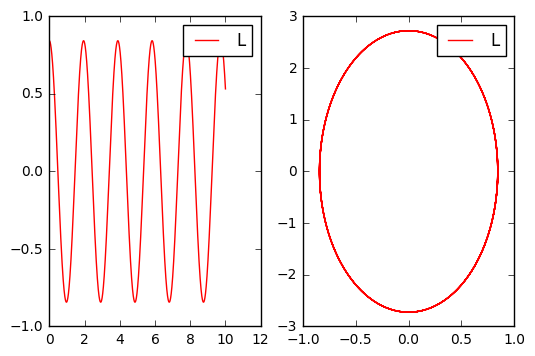

In [13]:
posPart, vitPart = solParticulierBcos(1,1,1,3.23)

solPartExa = [[posPart(t),vitPart(t)] for t in tL]

plot_pos_et_port([[tL,solPartExa]])

### Tracer solutions approchées

Maintenant pour $B = 1$ et $\Omega = 3.23$ on va essayer tracer la solution pour les mêmes valeurs qu'on a utilise avant pour le reste de valeurs.

In [14]:
g_L = define_g_L(1,1,1,3.23)
g_NL = define_g_NL(1,1,1,3.23)

T = 100
dt = 10.0/10000
x0 = [math.pi/6,0]

tL, xL = EDO.EulerSymplectique(0,x0,T,dt,g_L)

tNL, xNL = EDO.EulerSymplectique(0,x0,T,dt,g_NL)

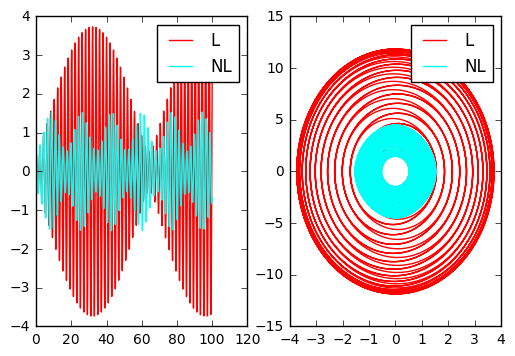

In [15]:
solutions = [[tL,xL],[tNL,xNL]]

plot_pos_et_port(solutions)

On peut voir qu'il y a de grands differences dans le comportement de deux solutions tres proches. Donc on doit savoir bien utiliser les modeles approximative parce que on peut trouver de mauvais resultats.

## 2 - Oscillateur de Duffing

La deuxieme partie de l'experience c'est modeliser l'oscillateur de Duffing. Cette oscilateur est la solution a le systeme de equations differentielles suivante.

$$\left\{
        \begin{array}{l}
            x'(t) = v(t) \\
            v'(t) = -\alpha x(t) - x^3(t) - \psi v(t) + Fcos(\omega t) \\
            x(0) = x_0 \\
            v(0) = v_0
        \end{array}
   \right.$$
   
La premier aproximation on va la faire en utilisant $\psi = 0$ et $F = 0$. 

### Energie du systeme

Avec $\psi = 0$ et $F = 0$ le systeme est le suivant:

$$\left\{
        \begin{array}{l}
            x'(t) = v(t) \\
            v'(t) = -\alpha x(t) - x^3(t)\\
            x(0) = x_0 \\
            v(0) = v_0
        \end{array}
   \right.$$

Comme dans le cas de pendule simple on a une fonction qui definit l'energie du système. Ici, la fonction qui modelise le systeme est:

$$ H(x,v) = \frac{1}{2}v^2 + \left( \frac{1}{4}x^4 + \frac{\alpha}{2}x^2 \right)$$

On a que $ t \mapsto H(x(t),v(t)) $  est constante pour $\psi = 0$ et $F = 0$.  En effet:

$$H'(x(t),v(t)) = 
\begin{pmatrix}
x^3(t) + \alpha x(t) & v(t)
\end{pmatrix}
\begin{pmatrix}
x'(t) \\
v'(t)
\end{pmatrix}
=x^3(t)v(t) + \alpha x(t)v(t) -\alpha x(t)v(t) -x^3(t)v(t) = 0 $$

Donc $H(x(t),v(t)) = cte.$ pour tout $t$ dans l'intervalle de definition.

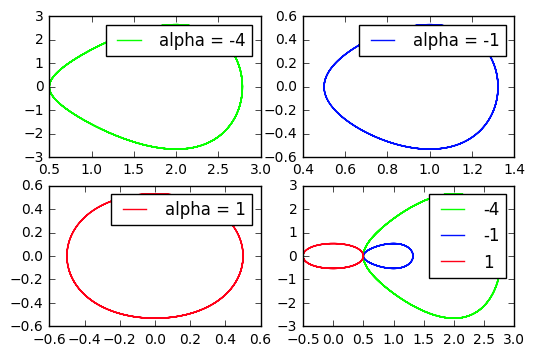

In [16]:
c_map = EDO.get_cmap(3)
alpha_vals = [-4, -1, 1] #differents valeurs de alpha
pos = 1
for alpha in alpha_vals:
    Gamma = [lambda v, t: v, lambda u, t: -alpha*u - u*u*u ] #Fonctions x' et v'
    t_, x_ = EDO.stormer_verlet(0,[0.5,0],0.001,20, Gamma) #Librerie EDO dans le même directoire que ce projet
    u = [x[0] for x in x_]
    v = [x[1] for x in x_]
    #Plot individuel de chaque courve
    plt.subplot(2,2,pos)
    plt.plot(u, v, color = c_map(pos))
    plt.legend(["alpha = %i"%alpha])
    #Plot de tout le courbes pour les comparer
    plt.subplot(2,2,4)
    plt.plot(u, v, color = c_map(pos))
    pos += 1

plt.legend(alpha_vals)

Pour different valeurs de alpha on a different ovoides.

### Compairaison avec euler explicite

Maintenant on va voir de differences d'erreur entre cet nouveau algorithme d'approximation et Euler Explicite que nous avions au premiere moment.

In [17]:
Gamma = [lambda v, t: v, lambda u, t: 4*u - u*u*u ]
f = lambda x,t:np.array([x[1], 4*x[0] - x[0]*x[0]*x[0]])
tEE_, xEE_ = EDO.euler_explicite(0,[0.5,0],0.001,20, f)
tSV_, xSV_ = EDO.stormer_verlet(0,[0.5,0],0.001,20, Gamma)

Pour voir quel algorithme est meilleur on va voir comme sont los espaces de phase et la quantité d'energie que perdre le systeme.

In [18]:
#On fait une fonction pour definir l'energie associé a chaque alpha pour ce problem de Cauchy
def define_H_for(alpha):
     return lambda x, v : 0.5*v*v + 0.25*x*x*x*x + 0.5*alpha*x*x

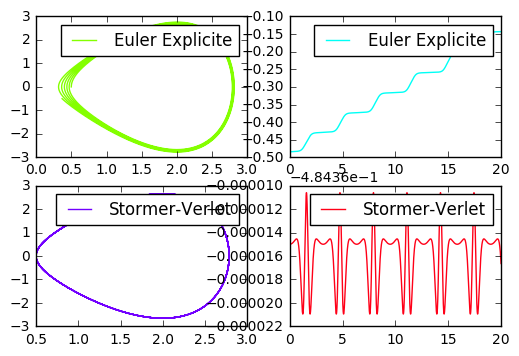

In [19]:
c_map = EDO.get_cmap(4)

H = define_H_for(-4) #On a H pour alpha = -4 comme on veut
uEE = [x[0] for x in xEE_]
vEE = [x[1] for x in xEE_]

plt.subplot(2,2,1)
plt.plot(uEE,vEE,color=c_map(1))
plt.legend(['Euler Explicite'])

plt.subplot(2,2,2)
H_ = [H(x[0],x[1]) for x in xEE_]
plt.plot(tEE_,H_,color=c_map(2))
plt.legend(['Euler Explicite'])

uSV = [x[0] for x in xSV_]
vSV = [x[1] for x in xSV_]

plt.subplot(2,2,3)
plt.plot(uSV,vSV,color=c_map(3))
plt.legend(['Stormer-Verlet'])

plt.subplot(2,2,4)
H_ = [H(x[0],x[1]) for x in xSV_]
plt.plot(tSV_,H_,color=c_map(4))
plt.legend(['Stormer-Verlet'])

On peut voir comme le methode de Euler Explicite n'approxime bien la solution et apres certain temps l'approximation est mauvais. Stormer-Verlet est capable d'approximmer mais ne respect pas que l'energie du systeme soit constante.

## Oscillateur amorti et non forcé

Avec $F = 0$ le systeme est le suivant:

$$\left\{
        \begin{array}{l}
            x'(t) = v(t) \\
            v'(t) = -\alpha x(t) - x^3(t) - \psi v(t)\\
            x(0) = x_0 \\
            v(0) = v_0
        \end{array}
   \right.$$
   
Pour differents valeurs de $\psi$ on voit que l'espace de phases est une espiral que tourne autour du point $ (1,0) $


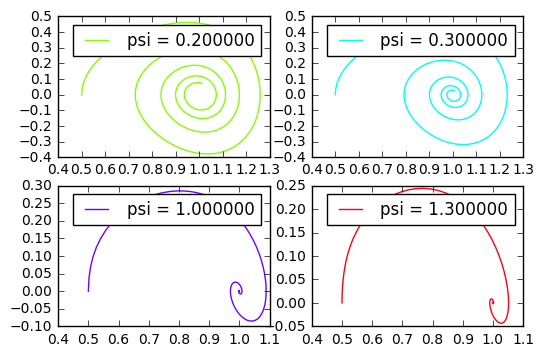

In [20]:
c_map = EDO.get_cmap(4)
psi_vals = [0.2,0.3,1,1.3] #differents valeurs de gamma
pos = 1
for psi in psi_vals:
    f = lambda x,t:np.array([x[1], x[0] - x[0]*x[0]*x[0] -psi*x[1]]) #Fonctions x' et v' alpha = -1
    t_, x_ = EDO.RK23(0.1,[0.5,0],0.1,0.01,20,0.0001,f) #Librerie EDO dans le même directoire que ce projet
    u = [x[0] for x in x_]
    v = [x[1] for x in x_]
    
    #Plot individuel de chaque courve
    plt.subplot(2,2,pos)
    plt.plot(u, v, color = c_map(pos))
    plt.legend(["psi = %f"%psi])
    pos = pos +1

## Oscillateur amorti et forcé

Dans le cadre le plus general on va utiliser l'equation originel et l'etudier pour $ \psi = 0.1, \omega = 1.4$ et $ x_0 = (0,0) $ 

### Representation de la position pendant le temps

En premier lieu on represente la position du pendule pendant le temps $t in [0,500]

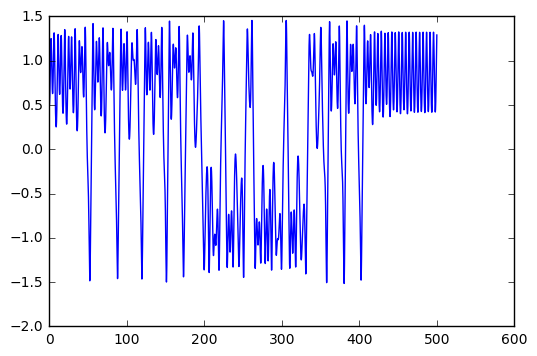

In [21]:
F = 0.29
omega = 1.4
T = 500
f = lambda x,t:np.array([x[1], x[0] - x[0]*x[0]*x[0] -0.1*x[1] + F*math.cos(omega*t)])
t_, x_ = EDO.RK23(0.1,[0.5,0],0.1,0.01,T,0.0001,f) #Librerie EDO dans le même directoire que ce projet
u = [x[0] for x in x_]
v = [x[1] for x in x_]

plt.plot(t_,u)

On voit que le comportement est un peu chaotique.

### Limitation du rang d'étude

Aprés, on etude ou la position s'estabilise les temps appartenant a l'intervalle $[400,500]$

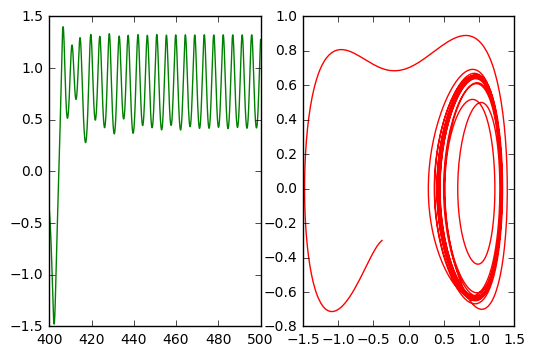

In [22]:
tg400, ug400, vg400 = EDO.separate_solutions(t_,u,v,400,500)
plt.subplot(121)
plt.plot(tg400,ug400,color = 'green')

plt.subplot(122)
plt.plot(ug400,vg400,color = 'red')

On peut observer que le comportement est plus proche a le comportement de l'oscillateur amorti et non forcé.

Pour voir le periode que l'oscillateur a quand il commence a etre periodique on essaye avec le periode de la forcé $k = \frac{2\pi}{\omega} $ 

In [23]:
k = 2*math.pi/omega
intervalle = [T-k,T]

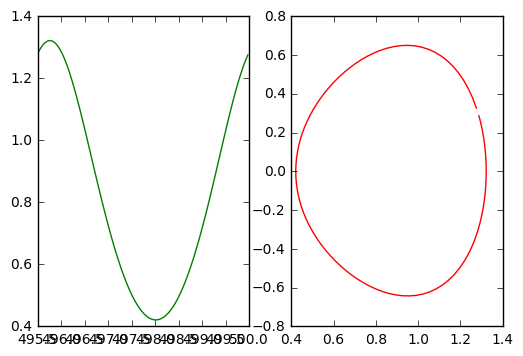

In [24]:
tk, uk, vk = EDO.separate_solutions(t_,u,v,intervalle[0],intervalle[1])

plt.subplot(121)
plt.plot(tk,uk,color = 'green')

plt.subplot(122)
plt.plot(uk,vk,color = 'red')

On voit que ça s'approche au periode de l'oscillateur

## Autres comportements pour données initialles differentes

On va utiliser maintenant $F = 0.32$ et $T = 1000$

In [25]:
F = 0.32
omega = 1.4
T = 1000
f = lambda x,t:np.array([x[1], x[0] - x[0]*x[0]*x[0] -0.1*x[1] + F*math.cos(omega*t)])
t_, x_ = EDO.RK23(0.1,[0.5,0],0.1,0.01,T,0.0001,f) #Librerie EDO dans le même directoire que ce projet
u = [x[0] for x in x_]
v = [x[1] for x in x_]

Comme on prevu que il tend vers un comportement periodique on etude le portrait de phase pour $t \in [T-100,T]$

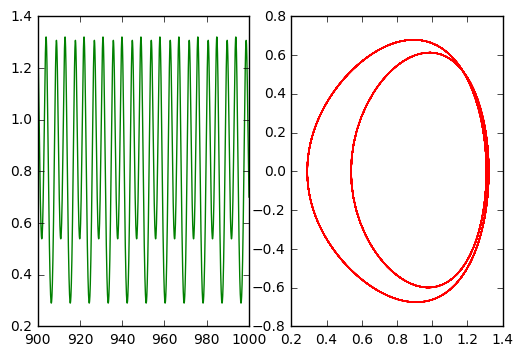

In [26]:
tg900, ug900, vg900 = EDO.separate_solutions(t_,u,v,900,1000)

plt.subplot(121)
plt.plot(tg900,ug900,color = 'green')

plt.subplot(122)
plt.plot(ug900,vg900,color = 'red')

On voit que pour $t \in [T-100,T]$ il parcour trop de fois et pour $t \in [T-\lambda,T]$ il manque encore un peut. On a testé pour different valeurs de $\lambda$ jusq'a trouver l'endroit desiré.

In [27]:
k = 2*math.pi/omega
intervalle = [T-2*k,T]

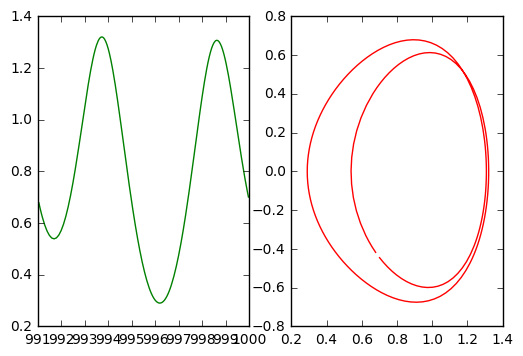

In [28]:
tk, uk, vk = EDO.separate_solutions(t_,u,v,intervalle[0],intervalle[1])

plt.subplot(121)
plt.plot(tk,uk,color = 'green')

plt.subplot(122)
plt.plot(uk,vk,color = 'red')

Donc on voit que prés de $i = 2$ on trouve la periodicité. Alors le periode c'est $2\lambda$.

### Autres données initialles
Maintenant on va tester pour  $F=0.338$ et $T=2000$

In [29]:
F = 0.338
omega = 1.4
T = 2000
f = lambda x,t:np.array([x[1], x[0] - x[0]*x[0]*x[0] -0.1*x[1] + F*math.cos(omega*t)])
t_, x_ = EDO.RK23(0.1,[0.5,0],0.1,0.01,T,0.0001,f) #Librerie EDO dans le même directoire que ce projet
u = [x[0] for x in x_]
v = [x[1] for x in x_]

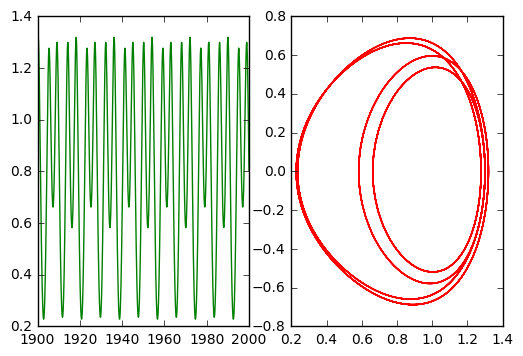

In [30]:
tg900, ug900, vg900 = EDO.separate_solutions(t_,u,v,1900,2000)

plt.subplot(121)
plt.plot(tg900,ug900,color = 'green')

plt.subplot(122)
plt.plot(ug900,vg900,color = 'red')

Et cette fois c'est pour i = 4 que on trouve la periodicité

In [35]:
k = 2*math.pi/omega
intervalle = [T-4*k,T] #i=4 on trouve un periode 

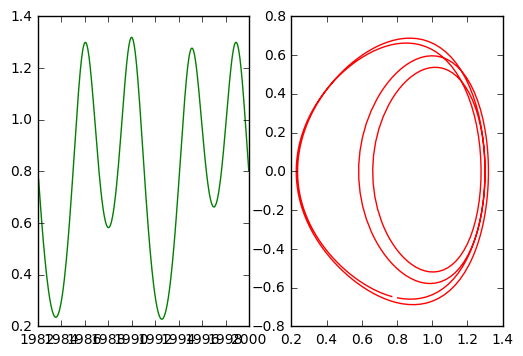

In [36]:
tk, uk, vk = EDO.separate_solutions(t_,u,v,intervalle[0],intervalle[1])

plt.subplot(121)
plt.plot(tk,uk,color = 'green')

plt.subplot(122)
plt.plot(uk,vk,color = 'red')

### Autres données initialles
Maintenant on va tester pour  $F=0.35$ et $T=3000$

In [37]:
F = 0.35
omega = 1.4
T = 3000
f = lambda x,t:np.array([x[1], x[0] - x[0]*x[0]*x[0] -0.1*x[1] + F*math.cos(omega*t)])
t_, x_ = EDO.RK23(0.1,[0.5,0],0.1,0.01,T,0.0001,f) #Librerie EDO dans le même directoire que ce projet
u = [x[0] for x in x_]
v = [x[1] for x in x_]

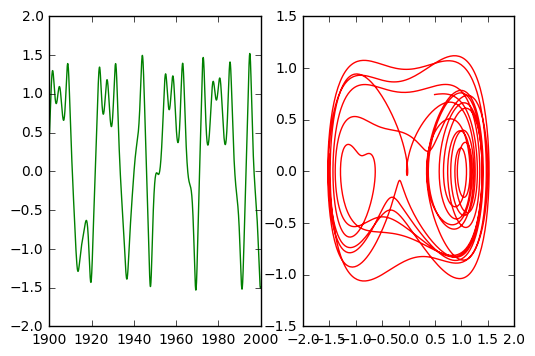

In [38]:
tg900, ug900, vg900 = EDO.separate_solutions(t_,u,v,1900,2000)

plt.subplot(121)
plt.plot(tg900,ug900,color = 'green')

plt.subplot(122)
plt.plot(ug900,vg900,color = 'red')

C'est bien claire que la periodicité ici n'est pas assurable.